# Исследование для магазина видеоигр «Стримчик»

### **Описание проекта**

**Заказчик:** интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. 

**Данные:** из открытых источников были получены данные от 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию: «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цели исследования**

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Также нужно проверить **следующие гипотезы**:


- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


**Ход иследования**

- **Подготовка данных**: загрузка и изучение общей информации из предоставленного датасета.

- **Предобработка данных**: обработка пропущенных значений, корректировка типов данных, дубликатов и других аномалий.

- **Исследовательский анализ данных**: описание и визуалиция информации об играх и платформах.

- **Составление портрета пользователя**: определение самых популярных платформ и жанров для пользователя из каждого региона.

- **Проверка гипотез**: проверка гипотез, описанных в целях исслелования.

- **Общий вывод** и подведение итогов по проделанным работам.

### **Содержание**



[Шаг 1. Загрузка данных](#1)

[Шаг 2. Предобработка данных](#2)

[Шаг 3. Исследовательский анализ данных](#3)

[Шаг 4. Составление портрета пользователя](#4)

[Шаг 5. Проверка гипотез](#5) 

[Общий вывод](#6)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

<a id=1></a>
### Загрузка данных

In [2]:
df = pd.read_csv('/games_data.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод по знакомству с данными**

- Всего в датасете 11 столбцов и 16715 строк.


- Названия столбцов написаны с большой буквы, это не по правилам хорошего кода. 


- Количество ненулевых значений в столбцах отличается, значит в следующих столбцах есть пропуски:
    - Name
    - Year_of_Release
    - Genre
    - Critic_Score
    - User_Score
    - Rating
    
    
- Датасет состоит из следующих типов данных:
    - object
    - float64

<a id=2></a>
### Предобработка данных

Приведём названия столбцов к нижнему регистру.

In [4]:
df.columns = df.columns.str.lower()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Еще раз ознакомимся с типами данных по каждому столбцу с помощью dtypes.

In [5]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Выведем на экран уникальные значения столбца critic_score.

In [6]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Так как столбцы critic_score и year_of_release содержат только целые числа (помимо пропусков) — приведём их к целочисленному типу данных. Затем выведем на экран список самых частотных значений по столбцу user_score.

In [7]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_score'] = df['critic_score'].astype('Int64')
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
1         2
0.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Столбец user_score имеет тип object из-за часто встречающегося значения «tbd». Оно расшифровывается как «to be determined» и означает, что игра пока не получила рейтинг. То есть по сути такое значение равносильно пропуску. 

Заменим все значения «tbd» по столбцу на пропуск и изменим тип данных по столбцу на float.
Затем проверим ещё раз типы данных по датасету.

In [8]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df['user_score'] = df['user_score'].astype('float')
df.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score         float64
rating              object
dtype: object

Посчитаем пропуски по каждому столбцу.

In [9]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

**Обшие причины пропусков**:

- техническая ошибка
- человеческий фактор 

Дополнительные причины по столбцу **year_of_release**:
- нет информации о годе релиза игры

Дополнительные причины по столбцам **critic_score, user_score, rating**:
- Игра не получила оценки пользователей, критиков или ESRB 

In [10]:
df[df['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


- Пропуски в name и genre взаимосвязаны, они встречаются на одних и тех же строках. Заполнить их к сожалению никак нельзя, удалим их. 

In [11]:
df = df.loc[df['name'].isna() == False]

- Пропуски в столбце year_of_release при желании можно заполнить вручную - нужно прогуглить название каждой игры и узнать дату её выхода. Но это слишком долго, поэтому оставим пропуски как есть.

- Пропуски в рейтинговых столбцах (critic_score, user_score, rating) также можно было бы заполнить вручную, если бы мы знали, с каких сайтов были взяты оценки игр. Но опять же, делать это очень долго.


- В critic_score и user_score мы можем заполнить пропуски средним или медианой, но мне кажется, что это будет некорректно. Эти значения могут исказить результаты исследования, так как занимают значительную часть выборки. Лучше оставить пропуски как есть.


- В rating также оставляем пропуски: вручную их заполнять слишком долго, а по-другому это сделать не получится.

Далее создадим столбец с суммарными продажами по каждой игре во всех регионах:

In [12]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df

/tmp/ipykernel_48/3126312005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN,0.01


In [13]:
df.duplicated().sum()

0

Полных дубликатов в данных не обнаружено. Дубликаты по стобцу name допускаются: одна и та же игра могла выйти сразу на нескольких платформах. То есть в датасете мы можем встретить строки с одинаковым названием игры, но разными платформами (например, PS3 и PC).


Однако в данных не должно быть несколько строк с данными об одной и той же игре на одной платформе. То есть, если мы встречаем две строки об игре Sonic the Hedgehog на платформе PS3, то одна из этих строк - неявный дубликат, его нужно удалить. Если первая строка с данными о PS3, а вторая - об XBOX360 — то всё окей, такие данные мы оставляем.

In [14]:
df.loc[df.duplicated(subset=['name', 'platform'], keep=False) == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,5.5,E,2.56
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T,1.25
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43,4.1,E10+,1.17
4127,Sonic the Hedgehog,PS3,<NA>,Platform,0.00,0.48,0.00,0.00,43,4.1,E10+,0.48
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82,8.5,T,0.08
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.5,E,0.01


С одной из игр всё не так просто: Need for Speed: Most Wanted выходила и в 2005, и в 2012. (То есть в 2012 вышел её ремейк с улучшенной графикой и тд.) Поэтому такие строки не являются дубликатами. Удалим неявные дубликаты по конкретным индексам строк: 4127 и 16230.

In [15]:
df.drop(index=[4127, 16230], inplace=True)
df.loc[df.duplicated(subset=['name', 'platform'], keep=False) == True]

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T,1.25
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82,8.5,T,0.08


Неявные дубликаты удалены.

**Вывод по предобработке данных**


- Названия всех столбцов в таблице по правилам хорошего кода приведены к нижнему регистру.
- Столбы year_of_release и critic_score приведены к целочисленному типу, так как содержат лишь целые числа.
- В столбце user_score значения «tbd» заменены на пропуски, так как равносильны им. Далее столбец приведён к типу данных float.
- Найдены пропуски в столбцах name, year_of_release, genre, critic_score, user_score, rating.
- Удалены пропуски по столбцам name и genre.
- По всем остальным столбцам пропуски остались необработанными.
- Создан столбец с суммарными продажами по каждой игре во всех регионах 'total_sales'.
- Полные дубликаты в данных отсутствуют.
- Найдены неявные дубликаты, содержащие информацию об одной и той же игре на одной и той же платформе. Первые вхождения сохранены, остальные вхождения - удалены.


<a id=3></a>
### Исследовательский анализ данных

Отсортируем игры по году выпуска. Затем построим гистограмму по столбцу.

In [16]:
print('Количество уникальных значений в столбце year_of_release:', len(df['year_of_release'].value_counts()))
df['year_of_release'].value_counts()

Количество уникальных значений в столбце year_of_release: 37


2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

Text(0, 0.5, 'количество выпущенных игр')

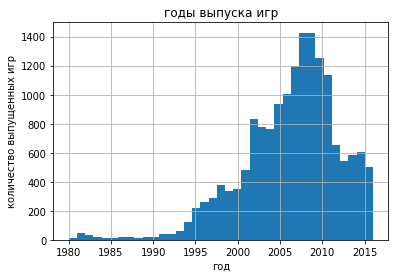

In [17]:
df['year_of_release'].hist(bins=37)
plt.title('годы выпуска игр')
plt.xlabel('год')
plt.ylabel('количество выпущенных игр')

Меньше всего игр было выпущено в 1980, 1983, 1984, 1985, 1986, 1987, 1988 и 1990 годах (от 9 до 17 игр за год). Они окажут самое незначительное влияние на результаты исследования. Больше всего игр было выпущено в 2008, 2009 и 2010 годах (1427, 1426, 1255 игр соответственно).

Далее изучим изменение продаж по платформам. Сначала сделаем сводную таблицу с общими продажами за каждый год по каждой платформе.

In [18]:
platform_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
platform_sales.sort_values('total_sales', ascending=False).head()


,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.16
Wii,907.51
DS,806.12


**Далее найдём выбросы по нинтендо DS**. Она выпущена в 2004, при этом в датасете исть информация об играх, выпущенных на этой платформе до 2004 года.

In [19]:
df.loc[(df['platform'] == 'DS') & (df['year_of_release'] < 2004)]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,NaN,NaN,0.02


In [20]:
df.loc[(df['platform'] == 'DS') & (df['name'] == 'Strongest Tokyo University Shogi DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,NaN,NaN,0.02


Больше строк с информацией об этой игре нет, поэтому можно не удалять её, а просто поменять год релиза на корректный. Она была выпушена в мае 2007 года.

In [21]:
df.loc[15957, 'year_of_release'] = 2007
df.loc[(df['platform'] == 'DS') & (df['year_of_release'] < 2004)]

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


Далее нужно визуализировать распределение продаж по годам для топ-5 платформ из полученного списка (то есть ps2, X360, ps3, wii и DS). 

In [22]:
top_platforms = df[df['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS'])]
top_platforms = top_platforms.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
top_platforms

,platform,year_of_release,total_sales
0,DS,2004,17.27
1,DS,2005,130.14
2,DS,2006,119.81
3,DS,2007,146.96
4,DS,2008,145.31
5,DS,2009,119.54
6,DS,2010,85.02
7,DS,2011,26.18
8,DS,2012,11.01
9,DS,2013,1.54


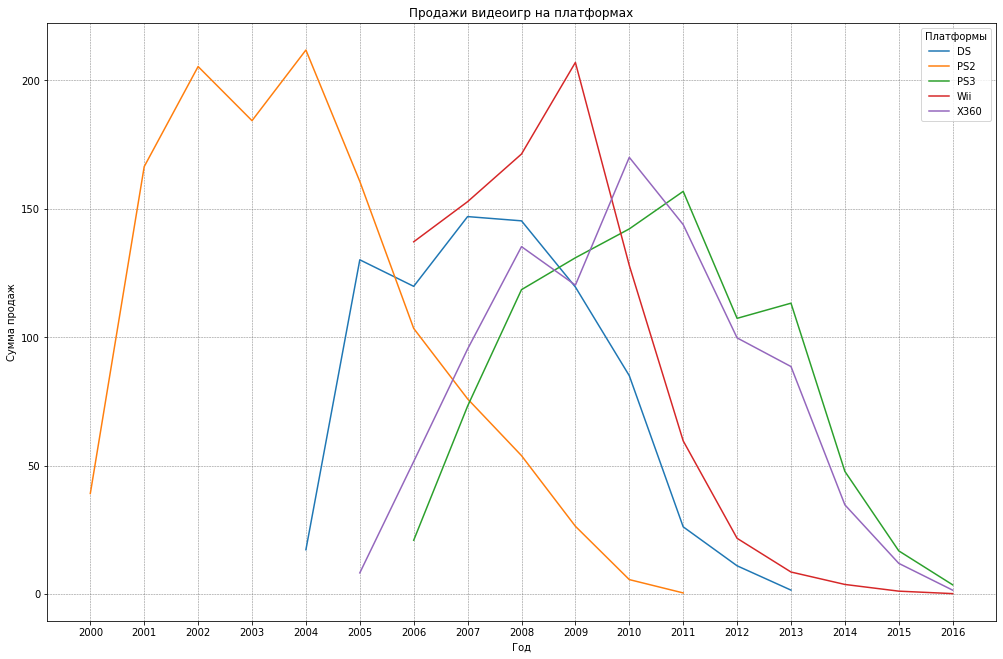

In [23]:
plt.figure(figsize=(17, 11))

for platform in top_platforms['platform'].unique():
    platform_data = top_platforms[top_platforms['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform)

plt.title('Продажи видеоигр на платформах')
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.xticks(top_platforms['year_of_release'].unique())
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')
plt.legend(title='Платформы')
plt.show()



- По этим графикам трудно выделить конкретный промежуток жизни консолей, так как их здесь представлено всего 5 штук. Если судить по тому, что мы видим — это 4-7 лет. (Например, нинтендо ви сильно просела по продажам уже на 4 год существования, тогда как иксбоксу на это потребовалось 8 лет). 

Следующий шаг — выбрать в данных **актуальный период**. Думаю стоит взять последние три года (2014-2016), так как индустрия очень динамичная, и нам нужно захватить только свежие тренды.

In [24]:
df = df.query('year_of_release >= 2014')

Далее определим лидирующие, растущие и падающие по продажам платформы относительно актуального периода. Сначала перезапишем нашу переменную со сводной таблицей с общими продажами по каждой консоли. Затем сравним их на столбчатой диаграмме.

In [25]:
platform_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index()
platform_sales.sort_values('total_sales', ascending=False)


,platform,total_sales
3,PS4,288.15
9,XOne,140.36
0,3DS,86.68
2,PS3,68.18
8,X360,48.22
7,WiiU,42.98
1,PC,27.05
5,PSV,22.40
6,Wii,5.07
4,PSP,0.36


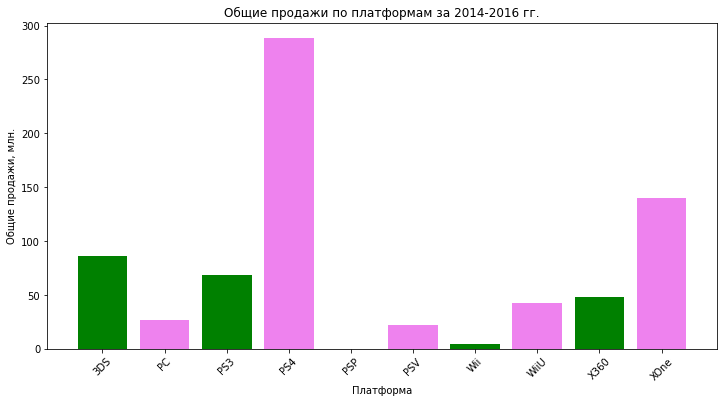

In [26]:
plt.figure(figsize=(12, 6))
plt.bar(platform_sales['platform'], platform_sales['total_sales'], color = ['green', 'violet'])
plt.title('Общие продажи по платформам за 2014-2016 гг.')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи, млн.')
plt.xticks(rotation=45)
plt.show()

**В топ-5 самых кассовых платформ входят PS4, XOne, 3DS, PS3 и XBOX360.**

Далее с помощью визуализации определим растущие и падающие платформы. Так получится выделить наиболее перспекивные платформы из общей массы. 


Так как у нас 10 уникальных платформ — строить график по каждой будет долго, да и сравнивать их так будет не очень удобно. Но строить график сразу по 10 консолям тоже неправильно — график будет перегружен. Данные нужно категоризировать по поколениям консолей. 

Для портативок определим отдельную категорию, построим графики по всем им сразу.

In [27]:
platform_categories = {
    'PS4': 'восьмое поколение',
    'XOne': 'восьмое поколение',
    'PC': 'восьмое поколение',
    'WiiU': 'восьмое поколение',
    'X360': 'седьмое поколение',
    'PS3': 'седьмое поколение',
    'Wii': 'седьмое поколение',
    '3DS': 'портативные',
    'PSP': 'портативные',
    'PSV': 'портативные',}
df['category'] = df['platform'].map(platform_categories)
grouped_df = df.groupby(['platform','year_of_release','category'])['total_sales'].sum().reset_index()
grouped_df


/tmp/ipykernel_48/415389107.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = df['platform'].map(platform_categories)


,platform,year_of_release,category,total_sales
0,3DS,2014,портативные,43.76
1,3DS,2015,портативные,27.78
2,3DS,2016,портативные,15.14
3,PC,2014,восьмое поколение,13.28
4,PC,2015,восьмое поколение,8.52
5,PC,2016,восьмое поколение,5.25
6,PS3,2014,седьмое поколение,47.76
7,PS3,2015,седьмое поколение,16.82
8,PS3,2016,седьмое поколение,3.60
9,PS4,2014,восьмое поколение,100.00


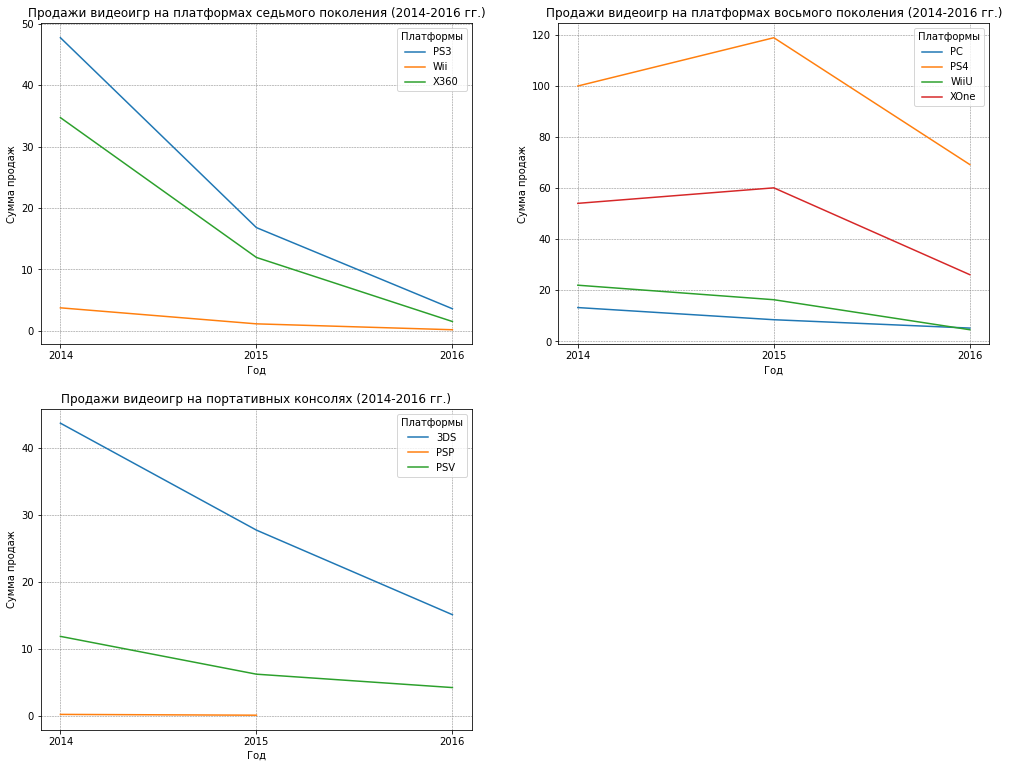

In [28]:
plt.figure(figsize=(17, 13))

#Седьмое поколение
plt.subplot(2, 2, 1)
platforms_to_plot = []
for platform in grouped_df['platform'].unique():
    platform_data = grouped_df.loc[(grouped_df['platform'] == platform) & 
        (grouped_df['category'].isin(['седьмое поколение']))]
    
    if not platform_data.empty:
        plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform)
        platforms_to_plot.append(platform)

plt.title('Продажи видеоигр на платформах седьмого поколения (2014-2016 гг.)')
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.xticks(grouped_df['year_of_release'].unique())
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')
plt.legend(title='Платформы', labels=platforms_to_plot)

#Восьмое поколение
plt.subplot(2, 2, 2)
platforms_to_plot = []
for platform in grouped_df['platform'].unique():
    platform_data = grouped_df.loc[(grouped_df['platform'] == platform) & 
        (grouped_df['category'].isin(['восьмое поколение']))]
    
    if not platform_data.empty:
        plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform)
        platforms_to_plot.append(platform)

plt.title('Продажи видеоигр на платформах восьмого поколения (2014-2016 гг.)')
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.xticks(grouped_df['year_of_release'].unique())
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')
plt.legend(title='Платформы', labels=platforms_to_plot)

#Портативные консоли
plt.subplot(2, 2, 3)
platforms_to_plot = []
for platform in grouped_df['platform'].unique():
    platform_data = grouped_df.loc[(grouped_df['platform'] == platform) & 
        (grouped_df['category'].isin(['портативные']))]
    
    if not platform_data.empty:
        plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform)
        platforms_to_plot.append(platform)

plt.title('Продажи видеоигр на портативных консолях (2014-2016 гг.)')
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.xticks(grouped_df['year_of_release'].unique())
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')
plt.legend(title='Платформы', labels=platforms_to_plot)
plt.show()

**Промежуточный вывод по потенциальной прибыльности платформ** 


- За период 2014-16 гг. продажи 7 поколения консолей сильно упали. Можем это связать с появлением новых, более соверменных платформ.


- У 8 поколения консолей наоборот, высокие продажи и потенциал, несмотря на сильное падение в 2016. (Оно может быть связано с тем, что данные за 2016 год неполные).


- Далее о портативных консолях. По ним, как и по консолям 7 поколения, мы видим тенденцию к снижению продаж. Она может быть связана с развитием видоигровой индустрии на мобильных устройствах (всё больше игр выходит на телефонах, и портативки теряют свою актуальность). Однако на момент 2016 всё ещё выпускают игры на пс вита и нинтендо 3дс. 


На основе всего вышеказанного, выделю потенциально прибыльные платформы на момент 2016:

- PS4
- XOne
- 3DS

Далее построим боксплот по глобальным продажам игр в разбивке по платформам. 

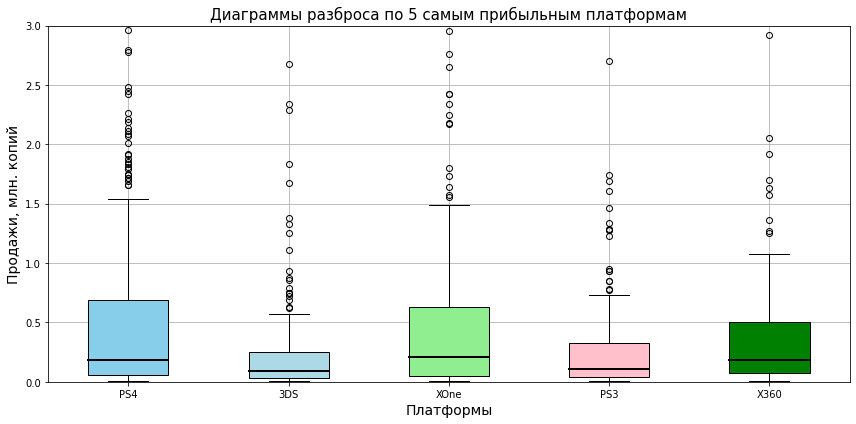

In [29]:
top_platforms = df[df['platform'].isin(['PS4', 'XOne', 'PS3', '3DS', 'X360'])]
data_to_plot = [top_platforms[top_platforms['platform'] == platform]['total_sales'].values
                for platform in top_platforms['platform'].unique()]

colors = ['skyblue', 'lightblue', 'lightgreen', 'pink', 'green']

plt.figure(figsize=(12, 6))
                    
box = plt.boxplot(data_to_plot, patch_artist=True, medianprops=dict(color='black',  linewidth=2))

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks(range(1, len(data_to_plot) + 1), top_platforms['platform'].unique())  
plt.title('Диаграммы разброса по 5 самым прибыльным платформам', fontsize=15)
plt.ylabel('Продажи, млн. копий', fontsize=14)
plt.xlabel('Платформы', fontsize=14)
plt.ylim(0, 3)
plt.tight_layout()
plt.grid()

plt.show()

In [30]:
df.groupby('platform')['total_sales'].median().sort_values(ascending=False).head()

platform
XOne    0.205
WiiU    0.190
PS4     0.185
Wii     0.180
X360    0.180
Name: total_sales, dtype: float64

- Медианы по всем платформам не превышают 0,5 млн проданных копий. 
- Самые высокие медианные продажи за актуальный период на XOne: 0.205 млн копий.
- Самые низкие - на X360 и Wii, по 0,180 млн копий.
- Ни по одной из платформ не обнаружено выбросов ниже нуля. 
- По PS4 и XOne третий квартиль превысил значение в 0,5 млн. 
- Медианы 3DS и PS3 меньше, чем на остальных платформах. Можем предположить, что игры на них продаются хуже.

Далее посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграммы рассеяния и посчитаем корреляцию между отзывами и продажами. Одна диаграмма будет по отзывам критиков, другая — по отзывам пользователей.

Диаграммы построим относительно XOne.

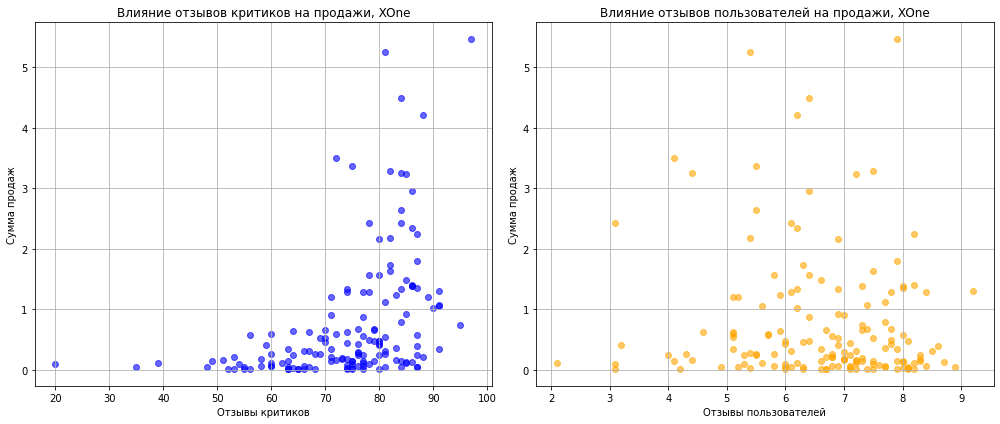

Корреляция между отзывами критиков и продажами: 0.42
Корреляция между отзывами пользователей и продажами: -0.09


In [31]:
plt.figure(figsize=(14, 6))

corr_research = df[df['platform'] == 'XOne'].dropna(subset=['critic_score', 'user_score', 'total_sales']).reset_index(drop=True)
corr_research['critic_score'] = corr_research['critic_score'].astype(float)

plt.subplot(1, 2, 1)
plt.scatter(corr_research['critic_score'], corr_research['total_sales'], color='blue', alpha=0.6)
plt.title('Влияние отзывов критиков на продажи, XOne')
plt.xlabel('Отзывы критиков')
plt.ylabel('Сумма продаж')
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(corr_research['user_score'], corr_research['total_sales'], color='orange', alpha=0.6)
plt.title('Влияние отзывов пользователей на продажи, XOne')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Сумма продаж')
plt.grid()

plt.tight_layout()
plt.show()

critic_correlation = corr_research['critic_score'].corr(corr_research['total_sales'])
user_correlation = corr_research['user_score'].corr(corr_research['total_sales'])

print(f'Корреляция между отзывами критиков и продажами: {critic_correlation:.2f}')
print(f'Корреляция между отзывами пользователей и продажами: {user_correlation:.2f}')

In [32]:
correlations = {}

for platform in ['PS4', 'XOne', 'PS3', '3DS', 'X360']:
    corr = df[df['platform'] == platform][['critic_score', 'user_score', 'total_sales']].corr()
    correlations[platform] = {
        'critic_sales': corr.loc['critic_score', 'total_sales'],
        'user_sales': corr.loc['user_score', 'total_sales']
    }

for platform, corr_values in correlations.items():
    print(f"{platform}: Критики: {corr_values['critic_sales']:.2f}, Пользователи: {corr_values['user_sales']:.2f}")

PS4: Критики: 0.40, Пользователи: -0.04
XOne: Критики: 0.43, Пользователи: -0.07
PS3: Критики: 0.45, Пользователи: -0.17
3DS: Критики: 0.31, Пользователи: 0.22
X360: Критики: 0.53, Пользователи: -0.14


По XboxOne получили немного другие значения, так как в этот раз не избавились от пропусков.

Выводы по влиянию отзывов на продажи видеоигр:

- Между отзывами критиков и продажами игр корреляция умеренно-положительная. Это может говорить о том, что **высокие отзывы критиков положительно влияют на продажи игр**. 

- Между отзывами пользователей и продажами игр корреляция в большинстве случаев отрицательная или близка к нулю. Это может указывать на **отсутствие или даже обратную связь между оценками пользователей и продажами.**

Далее посмотрим на общее распределение игр по жанрам. Визуализируем его с помощью столбчатой диаграммы.

array(['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
       'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

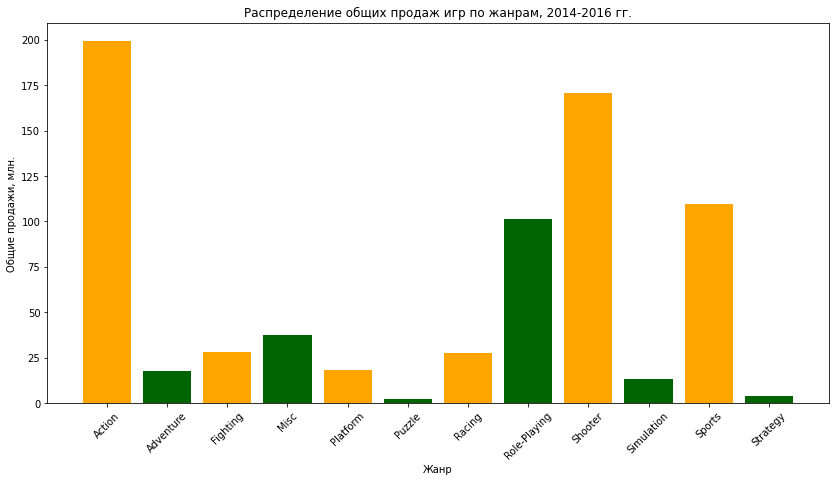

In [33]:
display(df['genre'].unique())
group_by_genre = df.groupby('genre')['total_sales'].sum().reset_index()

plt.figure(figsize=(14, 7))
plt.bar(group_by_genre['genre'], group_by_genre['total_sales'], color=['orange', 'darkgreen'])
plt.title('Распределение общих продаж игр по жанрам, 2014-2016 гг.')
plt.xlabel('Жанр')
plt.ylabel('Общие продажи, млн.')
plt.xticks(rotation=45)
plt.show()

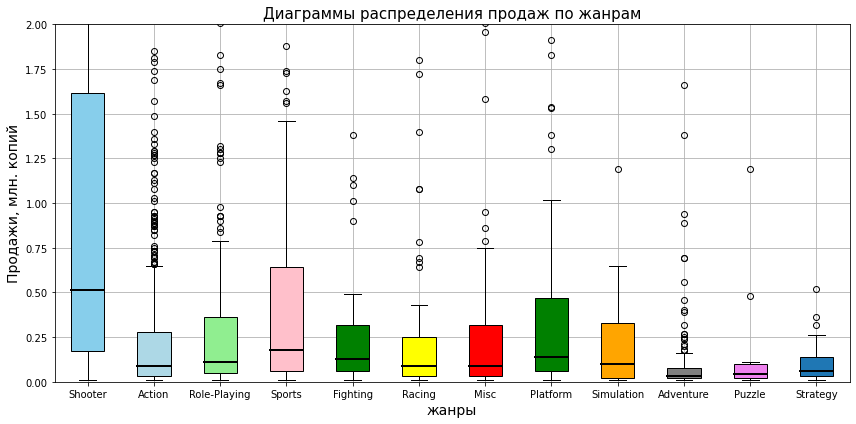

In [34]:
genres_to_plot = [df[df['genre'] == genre]['total_sales'].values
                for genre in df['genre'].unique()]

colors = ['skyblue', 'lightblue', 'lightgreen', 'pink', 'green', 'yellow', 'red', 'green', 'orange', 'grey', 'violet']

plt.figure(figsize=(12, 6))
                    
box = plt.boxplot(genres_to_plot, patch_artist=True, medianprops=dict(color='black',  linewidth=2))

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
plt.xticks(range(1, len(genres_to_plot) + 1), df['genre'].unique())  
plt.title('Диаграммы распределения продаж по жанрам', fontsize=15)
plt.ylabel('Продажи, млн. копий', fontsize=14)
plt.xlabel('жанры', fontsize=14)
plt.ylim(0, 2)
plt.tight_layout()
plt.grid()

plt.show()

In [35]:
df.groupby('genre')['total_sales'].median().sort_values(ascending=False)
                                                       

genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

- Самые прибыльные жанры - шутеры, спорт и платформеры. По ним самые высокие медианы продаж. Кроме того, первый квартиль по шутерам больше, чем медианы по многим другим жанрам.
- Жанры с самыми низкими продажами: стратегии, пазлы и приключения.
- У экшенов много выбросов, это может влиять на то, что по суммарным продажам они лидируют.

#### **Вывод по исследовательскому анализу данных**


Определен топ 5 самых кассовых платформ за всё время согласно нашему датасету: PS2, XBOX360, PS3, 3DS, Wii;


По датасету определен актуальный период с 2014 по 2016 гг.


- За период 2014-16 гг. продажи 7 поколения консолей сильно упали. Можем это связать с появлением новых, более соверменных платформ.

- У 8 поколения консолей наоборот, высокие продажи и потенциал, несмотря на сильное падение в 2016. (Оно может быть связано с тем, что данные за 2016 год неполные).

- Далее о портативных консолях. По ним, как и по консолям 7 поколения, мы видим тенденцию к снижению продаж. Она может быть связана с развитием видоигровой индустрии на мобильных устройствах (всё больше игр выходит на телефонах, и портативки теряют свою актуальность). Однако на момент 2016 всё ещё выпускают игры на пс вита и нинтендо 3дс. 


потенциально прибыльные платформы на момент 2016: **PS4, XOne, 3DS**


- Медианы по всем платформам за актуальный период не превышают 0,5 млн проданных копий. 
- Самые высокие медианные продажи за актуальный период на XOne: 0.205 млн копий.
- Самые низкие - на X360 и Wii, по 0,180 млн копий.
- Медианы 3DS и PS3 меньше, чем на остальных платформах. Можем предположить, что игры на них продаются хуже.


Между отзывами критиков и продажами игр корреляция умеренно-положительная. Это может говорить о том, что **высокие отзывы критиков положительно влияют на продажи игр**. 

Между отзывами пользователей и продажами игр корреляция в большинстве случаев отрицательная или близка к нулю. Это может указывать на **отсутствие или даже обратную связь между оценками пользователей и продажами.**


Самые прибыльные жанры - шутеры, спорт и платформеры. По ним самые высокие медианы продаж. Кроме того, первый квартиль по шутерам больше, чем медианы по многим другим жанрам.

Жанры с самыми низкими продажами: стратегии, пазлы и приключения.

<a id=4></a>
### Портреты пользователей

Для составления портретов сначала сделаем 3 отдельных датафрейма по каждому региону. Условие фильтрации: продажи по каждой игре в регионе должны быть больше нуля. То есть так мы будем уверены, что игра **была выпущена** в интересующем нас регионе.

После создания датафрейма для каждого регионо сделаем **круговую диаграмму с долями продаж**. На ней будет отображен топ-5 консолей с их долями, а также все остальные платформы, объединенные в одну группу. 

In [36]:
na_df = df[df['na_sales'] != 0]
eu_df = df[df['eu_sales'] != 0]
jp_df = df[df['jp_sales'] != 0]
print(len(na_df), len(eu_df), len(jp_df))

981 1067 873


,platform,total_sales
3,PS4,281.49
8,XOne,140.04
0,3DS,67.13
2,PS3,61.17
7,X360,48.02


<function matplotlib.pyplot.show(close=None, block=None)>

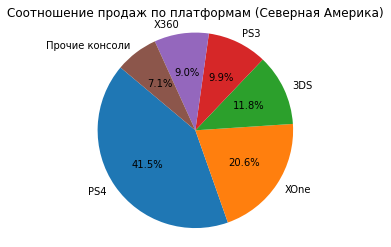

In [37]:
na_platforms = na_df.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index()
na_platforms = na_platforms.sort_values('total_sales', ascending=False)
display(na_platforms.head())

top_na_platforms = na_platforms.head(5)
other_na_sales = na_platforms.iloc[5:]['total_sales'].sum()
top_na_platforms = top_na_platforms.append({'platform': 'Прочие консоли', 'total_sales': other_na_sales}, ignore_index=True)

plt.pie(top_na_platforms.sort_values('total_sales', ascending=False)['total_sales'],
    labels=top_na_platforms['platform'].unique(),
    autopct='%1.1f%%', startangle=140)
plt.title('Cоотношение продаж по платформам (Северная Америка)')
plt.axis('equal')
plt.show

,platform,total_sales
3,PS4,280.42
8,XOne,139.70
0,3DS,64.21
2,PS3,60.53
7,X360,47.50


<function matplotlib.pyplot.show(close=None, block=None)>

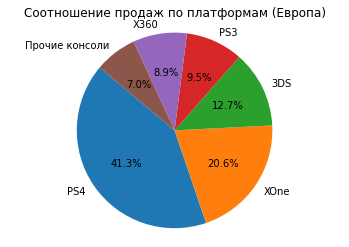

In [38]:
eu_platforms = eu_df.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index()
eu_platforms = eu_platforms.sort_values('total_sales', ascending=False)
display(eu_platforms.head())


top_eu_platforms = eu_platforms.head(5)
other_eu_sales = eu_platforms.iloc[5:]['total_sales'].sum()
top_eu_platforms = top_eu_platforms.append({'platform': 'Прочие консоли', 'total_sales': other_eu_sales}, ignore_index=True)

plt.pie(top_eu_platforms.sort_values('total_sales', ascending=False)['total_sales'],
    labels=top_eu_platforms['platform'].unique(),
    autopct='%1.1f%%', startangle=140)
plt.title('Cоотношение продаж по платформам (Европа)')
plt.axis('equal')
plt.show

,platform,total_sales
2,PS4,242.12
0,3DS,82.65
1,PS3,46.10
7,XOne,44.09
5,WiiU,36.14


<function matplotlib.pyplot.show(close=None, block=None)>

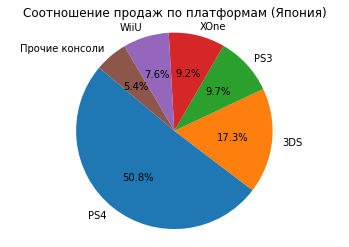

In [39]:
jp_platforms = jp_df.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index()
jp_platforms = jp_platforms.sort_values('total_sales', ascending=False)
display(jp_platforms.head())


top_jp_platforms = jp_platforms.head(5)
other_jp_sales = jp_platforms.iloc[5:]['total_sales'].sum()
top_jp_platforms = top_jp_platforms.append({'platform': 'Прочие консоли', 'total_sales': other_jp_sales}, ignore_index=True)

plt.pie(top_jp_platforms.sort_values('total_sales', ascending=False)['total_sales'],
    labels=top_jp_platforms['platform'].unique(),
    autopct='%1.1f%%', startangle=140)
plt.title('Cоотношение продаж по платформам (Япония)')
plt.axis('equal')
plt.show

На круговых диаграммах выше видно, что распределения продаж по Европе И Северной Америке похожи, только есть небольшие раличия в долях. А в по Японии диаграмма выгядит по-другому. 
- Более половины от общих продаж занимает PS4 (50,8%) - в Америке это 41,5, а в Европе 41,3%.
- Также 3DS занимает большую часть рынка. чем в других регионах (17,3%). В Америке это 11,8%, в Европе - 12,7%.
- XOne в Японии на 4 месте по продажам (9,2%), во всём остальном мире - на втором. В Америке и Европе по 20,6%.
- X360 вообще не вошел в топ-5 в Японии, его место занимает WiiU (7,6%)

Далее для каждого региона найдём топ-5 самых популярных жанров.

In [40]:
#Северная Америка
na_genres = na_df.pivot_table(index='genre', values='total_sales', aggfunc='sum').reset_index()
na_genres = na_genres.sort_values('total_sales', ascending=False)

#Европа
eu_genres = eu_df.pivot_table(index='genre', values='total_sales', aggfunc='sum').reset_index()
eu_genres = eu_genres.sort_values('total_sales', ascending=False)

#Япония
jp_genres = jp_df.pivot_table(index='genre', values='total_sales', aggfunc='sum').reset_index()
jp_genres = jp_genres.sort_values('total_sales', ascending=False)


display('5 самых популярных игровых жанров в Северной америке', na_genres.head())
display('5 самых популярных игровых жанров в Европе', eu_genres.head())
display('5 самых популярных игровых жанров в Японии', jp_genres.head())

'5 самых популярных игровых жанров в Северной америке'

,genre,total_sales
0,Action,178.57
8,Shooter,170.32
10,Sports,106.18
7,Role-Playing,89.07
3,Misc,34.23


'5 самых популярных игровых жанров в Европе'

,genre,total_sales
0,Action,178.92
8,Shooter,170.58
10,Sports,106.22
7,Role-Playing,86.09
3,Misc,34.93


'5 самых популярных игровых жанров в Японии'

,genre,total_sales
0,Action,127.77
8,Shooter,124.94
7,Role-Playing,84.30
10,Sports,49.42
2,Fighting,22.16


- Во всех трёх регионах на первом месте находятся видеоигры жанра экшен;
- Также по всем регионам в топе присутствуют шутеры, ролевые игры и спортивные игры;
- В Северной Америке и Европе 5 место занимает жанр «Misc», (miscellaneous - смешанный). То есть в эту группу входят самые разнообразные игры, не вошедшие в остальные жанры;
- В японском топе эта категория отсутствует, её место занимают файтинги.

Далее выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе. Построим столбчатую диаграмму на примере Японии.

339

rating
E        54
E10+     42
M       104
T       139
Name: name, dtype: int64

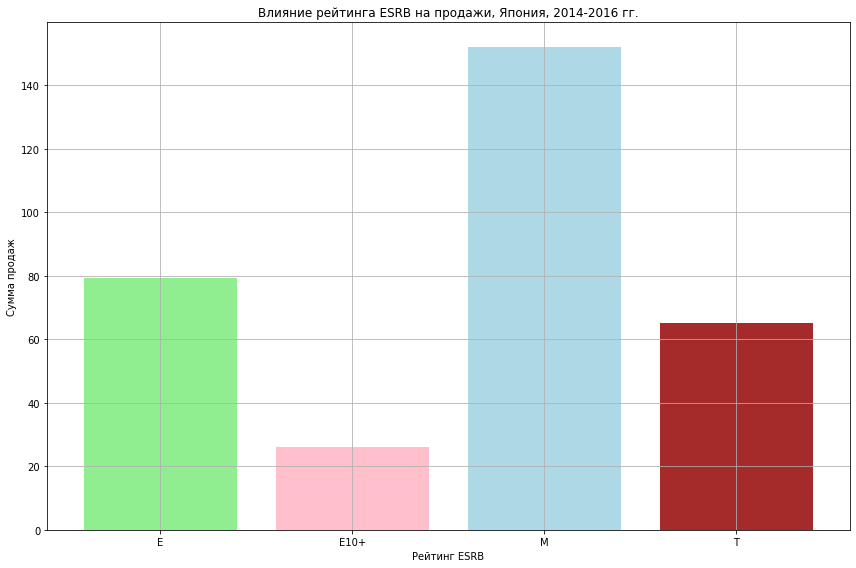

In [41]:
plt.figure(figsize=(12, 8))
jp_grouped = jp_df.groupby('rating')['total_sales'].sum().reset_index()
display(len(jp_df[jp_df['rating'].isna() == False]), jp_df.groupby('rating')['name'].count())
plt.bar(jp_grouped['rating'], jp_grouped['total_sales'], color=['lightgreen', 'pink', 'lightblue', 'brown'])
plt.title('Влияние рейтинга ESRB на продажи, Япония, 2014-2016 гг.')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Сумма продаж')
plt.grid()
plt.tight_layout()
plt.show()




- Лучше всего в Японии продаются игры с рейтингом M (mature) - то есть игры для взрослых.

- На втором месте игры категории E (everyone) - то есть игры для всех возрастов.

- Третье место - рейтинг T (Teen) - игры для подростков.

- И меньше всего продаж у игр с рейтингом E10+ (Everyone 10 and older) - то есть для всех, кто старше 10 лет. Вероятно это из-за того, что категория в принципе маленькая. Из 339 строк в неё входит только 42. 

- Мы не можем быть уверены в этих выводах на 100%. Как видно из кода ниже, рейтинг был выставлен менее чем половине из всех игр, выпущенных в Японии (либо произошла техническая ошибка при обработке и передаче данных). Поэтому то, что игры для взрослых продаются лучше, может быть неправдой.

In [42]:
display(len(jp_df))
len(jp_df[df['rating'].isna() == True])

873

/tmp/ipykernel_48/352800040.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(jp_df[df['rating'].isna() == True])


534

#### Вывод по портретам пользователей

- Для общих продаж каждого из трех регионов (Северная Америка, Европа, Япония) построена круговая диаграмма. На ней отображены доли продаж по 5 самым популярным платформам в регионе, а также по остальным платформам, объединённым в одну группу.


- Топ-5 платформ по Америке и Европе идентичен: Playstation 4, XBOX One, Nintendo 3DS, Playstation 3, Xbox 360. Однако в Японии он другой: Playstation 4, Nintendo 3DS, Playstation 3, XBOX One, Nintendo WiiU.


- Во всех трёх регионах на первом месте находятся видеоигры жанра экшен;
- Также по всем регионам в топе присутствуют шутеры, ролевые игры и спортивные игры;
- В Северной Америке и Европе 5 место занимает жанр «Misc», (miscellaneous - смешанный). То есть в эту группу входят самые разнообразные игры, не вошедшие в остальные жанры;
- В японском топе эта категория отсутствует, её место занимают файтинги.


- Произведен анализ влияния рейтинг ESRB на продажи на примере Японии. Самые высокие продажи у рейтинга M (для взрослых возврастов), на втором месте - E (для всех возврастов), на третьем месте - T (для подростков), но последнем месте - E10 (для всех старше 10 лет.)

<a id=5></a>
### Проверка гипотез

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Эту гипотезу можно проверить с помощью двухстороннего т-теста для двух выборок: 
- первая выборка: пользовательские рейтинги для игр на Xbox One
- вторая выборка: пользовательские рейтинги для игр на ПК


Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различны.


Во время проверки для этой и следующей гипотез зададим параметру альфа значение 0.01 (для большей точности)

In [43]:
alpha = .01

xone_u_score = df.loc[df['platform'] == 'XOne', 'user_score'].dropna().reset_index(drop=True)
pc_u_score = df.loc[df['platform'] == 'PC', 'user_score'].dropna().reset_index(drop=True)

results = st.ttest_ind(xone_u_score, pc_u_score)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC различны.')
else:
    print('Не отвергаем нулевую гипотезу: нет достаточных доказательств того, что средние пользовательские рейтинги платформ Xbox One и PC различны.')

p-значение: 0.10450507919348415
Не отвергаем нулевую гипотезу: нет достаточных доказательств того, что средние пользовательские рейтинги платформ Xbox One и PC различны.


**Средние пользовательские рейтинги жанров Action и Sports разные.**


Эту гипотезу также можно проверить с помощью двухстороннего т-теста для двух выборок: 
- первая выборка: пользовательские рейтинги для игр жанра Action
- вторая выборка: пользовательские рейтинги для игр жанра Sports


Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые;

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports различны.

In [44]:
action_u_score = df.loc[df['genre'] == 'Action', 'user_score'].dropna().reset_index(drop=True)
sports_u_score = df.loc[df['genre'] == 'Sports', 'user_score'].dropna().reset_index(drop=True)

results = st.ttest_ind(action_u_score, sports_u_score)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различны.')
else:
    print('Не отвергаем нулевую гипотезу: нет достаточных доказательств того, что средние пользовательские рейтинги жанров Action и Sports различны.')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports различны.


**Вывод по проверкам гипотез**

- В ходе исследования не удалось опровергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- В ходе исследования не удалось опровергнуть гипотезу о том, что средние пользовательские рейтинги жанров Action  и Sports разные.

<a id=6></a>
### Общий вывод

#### Предобработка данных с описанием найденных проблем и путей их решения

- Названия всех столбцов в таблице по правилам хорошего кода приведены к нижнему регистру.
- Столбы year_of_release и critic_score приведены к целочисленному типу, так как содержат лишь целые числа.
- В столбце user_score значения «tbd» заменены на пропуски, так как равносильны им. Далее столбец приведён к типу данных float.
- Найдены пропуски в столбцах name, year_of_release, genre, critic_score, user_score, rating.
- Удалены пропуски по столбцам name и genre.
- По всем остальным столбцам пропуски остались необработанными.
- Создан столбец с суммарными продажами по каждой игре во всех регионах 'total_sales'.
- Полные дубликаты в данных отсутствуют.
- Найдены неявные дубликаты, содержащие информацию об одной и той же игре на одной и той же платформе. Первые вхождения сохранены, остальные вхождения - удалены.


#### Исследовательский анализ данных

Определен топ 5 самых кассовых платформ за всё время согласно нашему датасету: PS2, XBOX360, PS3, 3DS, Wii;


По датасету определен актуальный период с 2014 по 2016 гг.


- За период 2014-16 гг. продажи 7 поколения консолей сильно упали. Можем это связать с появлением новых, более соверменных платформ.

- У 8 поколения консолей наоборот, высокие продажи и потенциал, несмотря на сильное падение в 2016. (Оно может быть связано с тем, что данные за 2016 год неполные).

- Далее о портативных консолях. По ним, как и по консолям 7 поколения, мы видим тенденцию к снижению продаж. Она может быть связана с развитием видоигровой индустрии на мобильных устройствах (всё больше игр выходит на телефонах, и портативки теряют свою актуальность). Однако на момент 2016 всё ещё выпускают игры на пс вита и нинтендо 3дс. 


потенциально прибыльные платформы на момент 2016: **PS4, XOne, 3DS**


- Медианы по всем платформам за актуальный период не превышают 0,5 млн проданных копий. 
- Самые высокие медианные продажи за актуальный период на XOne: 0.205 млн копий.
- Самые низкие - на X360 и Wii, по 0,180 млн копий.
- Медианы 3DS и PS3 меньше, чем на остальных платформах. Можем предположить, что игры на них продаются хуже.


Между отзывами критиков и продажами игр корреляция умеренно-положительная. Это может говорить о том, что **высокие отзывы критиков положительно влияют на продажи игр**. 

Между отзывами пользователей и продажами игр корреляция в большинстве случаев отрицательная или близка к нулю. Это может указывать на **отсутствие или даже обратную связь между оценками пользователей и продажами.**


Самые прибыльные жанры - шутеры, спорт и платформеры. По ним самые высокие медианы продаж. Кроме того, первый квартиль по шутерам больше, чем медианы по многим другим жанрам.

Жанры с самыми низкими продажами: стратегии, пазлы и приключения.

##### Портреты пользователей в различных регионах

- Для общих продаж каждого из трех регионов (Северная Америка, Европа, Япония) построена круговая диаграмма. На ней отображены доли продаж по 5 самым популярным платформам в регионе, а также по остальным платформам, объединённым в одну группу.


- Топ-5 платформ по Америке и Европе идентичен: Playstation 4, XBOX One, Nintendo 3DS, Playstation 3, Xbox 360. Однако в Японии он другой: Playstation 4, Nintendo 3DS, Playstation 3, XBOX One, Nintendo WiiU.


- Во всех трёх регионах на первом месте находятся видеоигры жанра экшен;
- Также по всем регионам в топе присутствуют шутеры, ролевые игры и спортивные игры;
- В Северной Америке и Европе 5 место занимает жанр «Misc», (miscellaneous - смешанный). То есть в эту группу входят самые разнообразные игры, не вошедшие в остальные жанры;
- В японском топе эта категория отсутствует, её место занимают файтинги.


- Произведен анализ влияния рейтинг ESRB на продажи на примере Японии. Самые высокие продажи у рейтинга M (для взрослых возврастов), на втором месте - E (для всех возврастов), на третьем месте - T (для подростков), но последнем месте - E10 (для всех старше 10 лет.)

#### Проверка гипотез

- В ходе исследования не удалось опровергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- В ходе исследования не удалось опровергнуть гипотезу о том, что средние пользовательские рейтинги жанров Action  и Sports разные.

#### Ответы на вопросы и цели исследования

В ходе исследования выявлены следующие закономерности, влияющие на успешность игр:
- На продажи игр положительно влияют отзывы критиков;
- Отзывы пользователей об играх слабо влияют на решение покупателя;
- Самые прибыльные жанры - шутеры, спорт и платформеры;
- Потенциально прибыльные платформы на момент 2016 года: **PS4, XOne, 3DS**.


#### Рекомендации для заказчика

Для повышения продаж рекомендую основывать свой ассортимент преимущественно на видеоиграх, которые удовлетворяют вышеописанным закономерностям. То есть на видеоиграх прибыльных жанров на актуальных платформах с высокими отзывами критиков.

Если компания хочет нацелиться на какой-то конкретный, региональный рынок — рекомендую обращать внимание на его особенности: в разных регионах популярны разные жанры и платформы. 